<a href="https://colab.research.google.com/github/butchland/fastai_nb_explorations/blob/master/baybayin_handwritten_character_dataset_initial_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!curl https://course.fast.ai/setup/colab | bash

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   322  100   322    0     0    555      0 --:--:-- --:--:-- --:--:--   555
Updating fastai...
Done.


In [2]:
!pip install fastcore --upgrade
!pip install fastai2 --upgrade

     |████████████████████████████████| 194kB 2.7MB/s 


In [0]:
from fastai2.vision.all import *

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
%cd /content/data
!git clone https://github.com/jmbantay/Baybayin-Handwritten-Character-Dataset.git

/root/.fastai/data
Cloning into 'Baybayin-Handwritten-Character-Dataset'...
remote: Enumerating objects: 38404, done.
remote: Total 38404 (delta 0), reused 0 (delta 0), pack-reused 38404
Receiving objects: 100% (38404/38404), 116.26 MiB | 10.80 MiB/s, done.
Resolving deltas: 100% (3/3), done.
Checking out files: 100% (38399/38399), done.


In [0]:
!mv Baybayin-Handwritten-Character-Dataset/raw .
!rm -rf Baybayin-Handwritten-Character-Dataset
!mv raw baybayin-handwritten-character-dataset
%cd /content

In [0]:
path = Path('data')/'baybayin-handwritten-character-dataset'

In [9]:
Path.BASE_PATH = path; path.ls()

(#19) [Path('kuw'),Path('ma'),Path('ba'),Path('ou'),Path('la'),Path('ya'),Path('ei'),Path('pa'),Path('ka'),Path('na')...]

In [10]:
len(path.ls())

19

In [11]:
vocab = [p.name for p in path.ls()];list(vocab)

['kuw',
 'ma',
 'ba',
 'ou',
 'la',
 'ya',
 'ei',
 'pa',
 'ka',
 'na',
 'dara',
 'nga',
 'ha',
 'wa',
 'a',
 'sa',
 'ga',
 'ta',
 'tul']

In [12]:
imgs = get_image_files(path);len(imgs)

38398

In [0]:
imgs_series = pd.Series(data=imgs,name='filename',dtype='object')

In [14]:
imgs_series.iloc[0]

Path('kuw/kuw_01088_file039.jpg')

In [15]:
img_df = pd.DataFrame(data=imgs_series);img_df.head()

,filename
0,data/baybayin-handwritten-character-dataset/kuw/kuw_01088_file039.jpg
1,data/baybayin-handwritten-character-dataset/kuw/kuw_00865_file063.jpg
2,data/baybayin-handwritten-character-dataset/kuw/kuw_00359_file030.jpg
3,data/baybayin-handwritten-character-dataset/kuw/kuw_00367_file034.jpg
4,data/baybayin-handwritten-character-dataset/kuw/kuw_01300_file145.jpg


In [0]:
img_df['image'] = img_df.filename.apply(lambda file: PILImage.create(file))

In [17]:
img_df.head()

,filename,image
0,data/baybayin-handwritten-character-dataset/kuw/kuw_01088_file039.jpg,PILImage mode=RGB size=8x62
1,data/baybayin-handwritten-character-dataset/kuw/kuw_00865_file063.jpg,PILImage mode=RGB size=29x54
2,data/baybayin-handwritten-character-dataset/kuw/kuw_00359_file030.jpg,PILImage mode=RGB size=4x68
3,data/baybayin-handwritten-character-dataset/kuw/kuw_00367_file034.jpg,PILImage mode=RGB size=16x40
4,data/baybayin-handwritten-character-dataset/kuw/kuw_01300_file145.jpg,PILImage mode=RGB size=15x44


In [0]:
img_df['shape'] = img_df.image.apply(lambda img: img.shape)

In [19]:
img_df.head()

,filename,image,shape
0,data/baybayin-handwritten-character-dataset/kuw/kuw_01088_file039.jpg,PILImage mode=RGB size=8x62,"(62, 8)"
1,data/baybayin-handwritten-character-dataset/kuw/kuw_00865_file063.jpg,PILImage mode=RGB size=29x54,"(54, 29)"
2,data/baybayin-handwritten-character-dataset/kuw/kuw_00359_file030.jpg,PILImage mode=RGB size=4x68,"(68, 4)"
3,data/baybayin-handwritten-character-dataset/kuw/kuw_00367_file034.jpg,PILImage mode=RGB size=16x40,"(40, 16)"
4,data/baybayin-handwritten-character-dataset/kuw/kuw_01300_file145.jpg,PILImage mode=RGB size=15x44,"(44, 15)"


In [20]:
img_df['img_width'] = img_df.image.apply(lambda img: img.shape[0])
img_df['img_height'] = img_df.image.apply(lambda img: img.shape[1])
img_df.head()

,filename,image,shape,img_width,img_height
0,data/baybayin-handwritten-character-dataset/kuw/kuw_01088_file039.jpg,PILImage mode=RGB size=8x62,"(62, 8)",62,8
1,data/baybayin-handwritten-character-dataset/kuw/kuw_00865_file063.jpg,PILImage mode=RGB size=29x54,"(54, 29)",54,29
2,data/baybayin-handwritten-character-dataset/kuw/kuw_00359_file030.jpg,PILImage mode=RGB size=4x68,"(68, 4)",68,4
3,data/baybayin-handwritten-character-dataset/kuw/kuw_00367_file034.jpg,PILImage mode=RGB size=16x40,"(40, 16)",40,16
4,data/baybayin-handwritten-character-dataset/kuw/kuw_01300_file145.jpg,PILImage mode=RGB size=15x44,"(44, 15)",44,15


In [21]:
img_df['max_dim'] = img_df.apply(lambda row: row['img_height'] if row['img_height'] > row['img_width'] else row['img_width'], axis=1)
img_df.head()

,filename,image,shape,img_width,img_height,max_dim
0,data/baybayin-handwritten-character-dataset/kuw/kuw_01088_file039.jpg,PILImage mode=RGB size=8x62,"(62, 8)",62,8,62
1,data/baybayin-handwritten-character-dataset/kuw/kuw_00865_file063.jpg,PILImage mode=RGB size=29x54,"(54, 29)",54,29,54
2,data/baybayin-handwritten-character-dataset/kuw/kuw_00359_file030.jpg,PILImage mode=RGB size=4x68,"(68, 4)",68,4,68
3,data/baybayin-handwritten-character-dataset/kuw/kuw_00367_file034.jpg,PILImage mode=RGB size=16x40,"(40, 16)",40,16,40
4,data/baybayin-handwritten-character-dataset/kuw/kuw_01300_file145.jpg,PILImage mode=RGB size=15x44,"(44, 15)",44,15,44


In [22]:
img_df['max_dim'].describe()

count    38398.000000
mean        89.697719
std         20.783199
min         39.000000
25%         75.000000
50%         88.000000
75%        103.000000
max        198.000000
Name: max_dim, dtype: float64

In [23]:
img_df['character'] = img_df.filename.apply(lambda f: parent_label(f))
img_df.tail()

,filename,image,shape,img_width,img_height,max_dim,character
38393,data/baybayin-handwritten-character-dataset/tul/tul_00728_file174.jpg,PILImage mode=RGB size=59x70,"(70, 59)",70,59,70,tul
38394,data/baybayin-handwritten-character-dataset/tul/tul_00647_file134.jpg,PILImage mode=RGB size=43x89,"(89, 43)",89,43,89,tul
38395,data/baybayin-handwritten-character-dataset/tul/tul_00932_file096.jpg,PILImage mode=RGB size=30x45,"(45, 30)",45,30,45,tul
38396,data/baybayin-handwritten-character-dataset/tul/tul_00546_file083.jpg,PILImage mode=RGB size=30x71,"(71, 30)",71,30,71,tul
38397,data/baybayin-handwritten-character-dataset/tul/tul_00699_file160.jpg,PILImage mode=RGB size=51x56,"(56, 51)",56,51,56,tul


In [24]:
img_df.head()

,filename,image,shape,img_width,img_height,max_dim,character
0,data/baybayin-handwritten-character-dataset/kuw/kuw_01088_file039.jpg,PILImage mode=RGB size=8x62,"(62, 8)",62,8,62,kuw
1,data/baybayin-handwritten-character-dataset/kuw/kuw_00865_file063.jpg,PILImage mode=RGB size=29x54,"(54, 29)",54,29,54,kuw
2,data/baybayin-handwritten-character-dataset/kuw/kuw_00359_file030.jpg,PILImage mode=RGB size=4x68,"(68, 4)",68,4,68,kuw
3,data/baybayin-handwritten-character-dataset/kuw/kuw_00367_file034.jpg,PILImage mode=RGB size=16x40,"(40, 16)",40,16,40,kuw
4,data/baybayin-handwritten-character-dataset/kuw/kuw_01300_file145.jpg,PILImage mode=RGB size=15x44,"(44, 15)",44,15,44,kuw


In [25]:
img_df['character'].describe()

count     38398
unique       19
top          ka
freq       2564
Name: character, dtype: object

In [26]:
img_df['character'].value_counts()

ka      2564
ga      2479
dara    2410
ha      2397
nga     2378
na      2365
wa      2308
ta      2302
la      2284
pa      2255
ya      2249
ma      2185
sa      2155
ba      2088
a       1307
ei      1294
ou      1287
kuw     1091
tul     1000
Name: character, dtype: int64

In [27]:
img1 = PILImage.create(imgs[0]);img1

In [28]:
img1.shape

(62, 8)

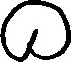

In [29]:
img2 = PILImage.create(imgs[3898]);img2

In [30]:
img2.shape

(62, 71)

In [0]:
dblock = DataBlock(
    blocks=(ImageBlock(cls=PILImageBW),CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    splitter=RandomSplitter(seed=42),
    item_tfms=Resize(224, ResizeMethod.Squish),
    batch_tfms=[]
)

Setting-up type transforms pipelines
Found 38398 items
2 datasets of sizes 30719,7679
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize

Building one sample
  Pipeline: PILBase.create
    starting from
      data/baybayin-handwritten-character-dataset/ha/ha_00905_file045.jpg
    applying PILBase.create gives
      PILImageBW mode=L size=104x34
  Pipeline: parent_label -> Categorize
    starting from
      data/baybayin-handwritten-character-dataset/ha/ha_00905_file045.jpg
    applying parent_label gives
      ha
    applying Categorize gives
      TensorCategory(5)

Final sample: (PILImageBW mode=L size=104x34, TensorCategory(5))


Setting up after_item: Pipeline: Resize -> ToTensor
Setting up before_batch: Pipeline: 
Setting up after_batch: Pipeline: IntToFloatTensor

Building one batch
Applying item_tfms to the first sample:
  Pipeline: Resize -> ToTensor
    starting from
      (PILImageBW mode=L size=104x34, TensorCategory(5))
    applying Resize g

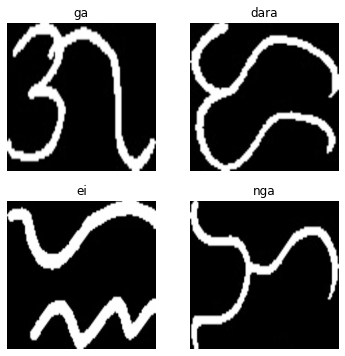

In [32]:
dblock.summary(path,show_batch=true)

In [0]:
ou_imgs = img_df[img_df.character == 'ou']
ka_imgs = img_df[img_df.character == 'ka']

In [34]:
ou_imgs.head()

,filename,image,shape,img_width,img_height,max_dim,character
5364,data/baybayin-handwritten-character-dataset/ou/ou_01016_file003.jpg,PILImage mode=RGB size=29x61,"(61, 29)",61,29,61,ou
5365,data/baybayin-handwritten-character-dataset/ou/ou_00913_file087.jpg,PILImage mode=RGB size=42x83,"(83, 42)",83,42,83,ou
5366,data/baybayin-handwritten-character-dataset/ou/ou_01042_file016.jpg,PILImage mode=RGB size=43x82,"(82, 43)",82,43,82,ou
5367,data/baybayin-handwritten-character-dataset/ou/ou_00542_file081.jpg,PILImage mode=RGB size=37x84,"(84, 37)",84,37,84,ou
5368,data/baybayin-handwritten-character-dataset/ou/ou_00008_file004.jpg,PILImage mode=RGB size=37x53,"(53, 37)",53,37,53,ou


In [0]:
dls = dblock.dataloaders(path)

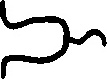

In [37]:
img3 = PILImageBW.create(Path('data/baybayin-handwritten-character-dataset/nga/nga_02449_file117.jpg'));img3

In [38]:
img3.shape

(79, 107)

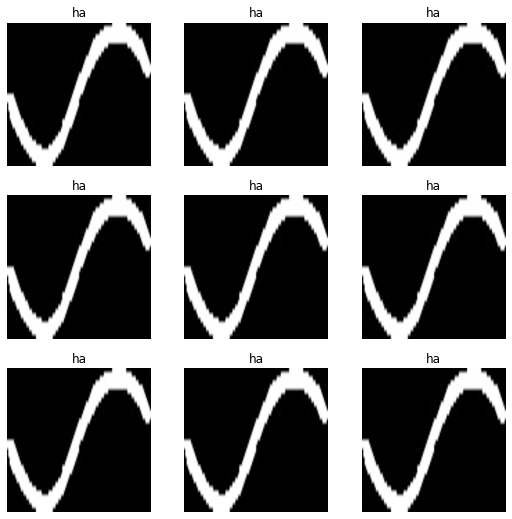

In [39]:
dls.show_batch(unique=True)

In [0]:
dblock2 = dblock.new(item_tfms=Resize(224, ResizeMethod.Squish),batch_tfms=[])

Setting-up type transforms pipelines
Found 38398 items
2 datasets of sizes 30719,7679
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize

Building one sample
  Pipeline: PILBase.create
    starting from
      data/baybayin-handwritten-character-dataset/ha/ha_00905_file045.jpg
    applying PILBase.create gives
      PILImageBW mode=L size=104x34
  Pipeline: parent_label -> Categorize
    starting from
      data/baybayin-handwritten-character-dataset/ha/ha_00905_file045.jpg
    applying parent_label gives
      ha
    applying Categorize gives
      TensorCategory(5)

Final sample: (PILImageBW mode=L size=104x34, TensorCategory(5))


Setting up after_item: Pipeline: Resize -> ToTensor
Setting up before_batch: Pipeline: 
Setting up after_batch: Pipeline: IntToFloatTensor

Building one batch
Applying item_tfms to the first sample:
  Pipeline: Resize -> ToTensor
    starting from
      (PILImageBW mode=L size=104x34, TensorCategory(5))
    applying Resize g

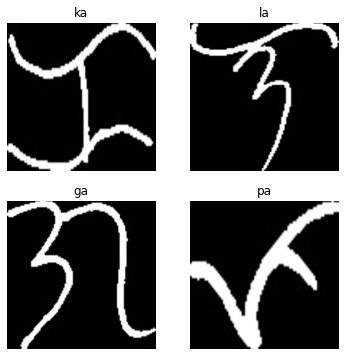

In [41]:
dblock2.summary(path, show_batch=True)

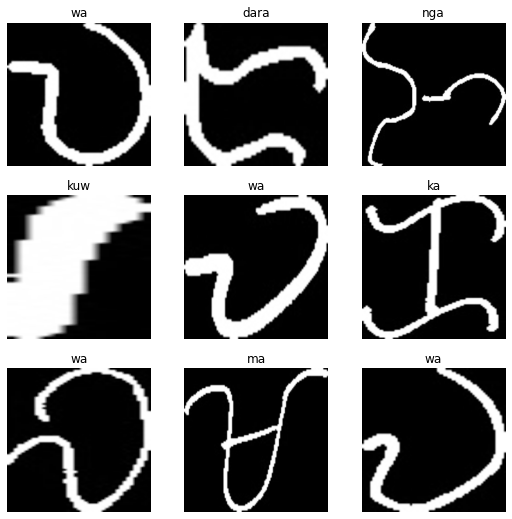

In [42]:
dls2 = dblock2.dataloaders(path)
dls2.show_batch()

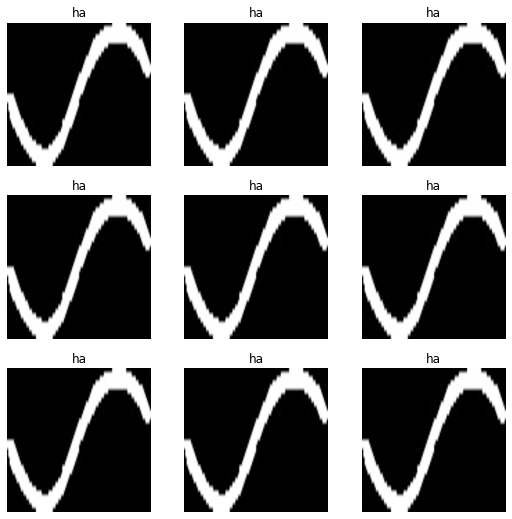

In [43]:
dls2.show_batch(unique=True)

In [44]:
%cd data/
!zip -r baybayin-handwritten-character-dataset baybayin-handwritten-character-dataset

Streaming output truncated to the last 5000 lines.
  adding: baybayin-handwritten-character-dataset/ga/ga_00074_file019.jpg (deflated 1%)
  adding: baybayin-handwritten-character-dataset/ga/ga_01491_file012.jpg (deflated 1%)
  adding: baybayin-handwritten-character-dataset/ga/ga_00231_file058.jpg (deflated 2%)
  adding: baybayin-handwritten-character-dataset/ga/ga_01580_file034.jpg (deflated 1%)
  adding: baybayin-handwritten-character-dataset/ga/ga_01821_file095.jpg (deflated 2%)
  adding: baybayin-handwritten-character-dataset/ga/ga_01696_file063.jpg (deflated 1%)
  adding: baybayin-handwritten-character-dataset/ga/ga_00156_file039.jpg (deflated 0%)
  adding: baybayin-handwritten-character-dataset/ga/ga_01611_file042.jpg (deflated 1%)
  adding: baybayin-handwritten-character-dataset/ga/ga_00542_file007.jpg (deflated 2%)
  adding: baybayin-handwritten-character-dataset/ga/ga_02548_file001.jpg (deflated 2%)
  adding: baybayin-handwritten-character-dataset/ga/ga_00633_file031.jpg (defla

In [0]:
!mkdir -p /content/drive/My\ Drive/fastai_v4/data
!cp baybayin-handwritten-character-dataset.zip /content/drive/My\ Drive/fastai_v4/data
%cd /content